In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Christy\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.read_csv('data/salary_synteticdata.csv')

In [3]:
data.head()

,Age,Salary
0,20,38500
1,20,38500
2,20,38500
3,20,38500
4,20,38500


In [4]:
data.isna().sum()

Age       0
Salary    0
dtype: int64

In [5]:
data.dtypes

Age       int64
Salary    int64
dtype: object

In [6]:
data.shape

(1000, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x19351773888>,
 'caps': [<matplotlib.lines.Line2D at 0x1935177ac88>,
 'boxes': [<matplotlib.lines.Line2D at 0x19351765d88>],
 'medians': [<matplotlib.lines.Line2D at 0x19351784e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x19351789e88>],
 'means': []}

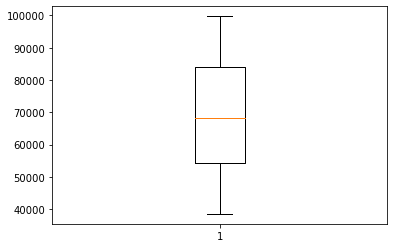

In [7]:
plt.boxplot(data['Salary']) #there are no outliers since the data is synthetic

{'whiskers': [<matplotlib.lines.Line2D at 0x1935182bc88>,
 'caps': [<matplotlib.lines.Line2D at 0x19351831cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x193517e3d88>],
 'medians': [<matplotlib.lines.Line2D at 0x19351834dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19351834ec8>],
 'means': []}

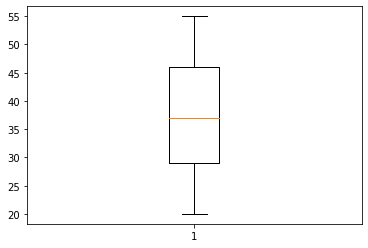

In [8]:
plt.boxplot(data['Age']) #there are no outliers since the data is synthetic

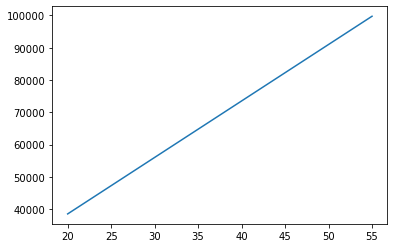

In [9]:
plt.plot(data['Age'],data['Salary']) #data has a good liner relationship

In [10]:
data.corr() #data has a correlation of 1

,Age,Salary
Age,1.0,1.0
Salary,1.0,1.0


### since there is no missing values and impurities no preprocessing is required.


### split the data into X and y
- X is the set of input variables (Age)
- y is the target variable (Salary)

In [11]:
X = data['Age']
y = data['Salary']

In [12]:
X.head()

0    20
1    20
2    20
3    20
4    20
Name: Age, dtype: int64

In [13]:
y.head()

0    38500
1    38500
2    38500
3    38500
4    38500
Name: Salary, dtype: int64

In [14]:
type(X)

pandas.core.series.Series

In [15]:
X.shape

(1000,)

### For a sklearn model the input X should be a DataFrame

In [16]:
X=X.values.reshape(X.shape[0], 1) #X should be an 2d array or dataframe

In [17]:
X.shape

(1000, 1)

# split the data into train and test sets
- Train data is used for training the model
- Test data is used to test/evaluate the model

In [18]:
from sklearn.model_selection import train_test_split #we are only importing  train_test_split function from sklearn within the class model_selection

#train_test_split is splitiing the data randomnly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #75% data will be for training and 25% data for testing

In [19]:
X_train.shape

(750, 1)

In [20]:
X_test.shape

(250, 1)

In [21]:
y_train.shape #this is a series

(750,)

In [22]:
y_test.shape

(250,)

### Use Linear Regression for modelling

In [23]:
from sklearn.linear_model import LinearRegression  #importing LinearRegression from sklearn within the class linear_model

In [24]:
lin_reg = LinearRegression() #creating object of LinearRegression

### fit command is used for training a model using train data.

In [25]:
lin_reg.fit(X_train,y_train) #training and fitting LR object using training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### coeeficients of linear regression - m

In [26]:
m  = lin_reg.coef_
m[0]

1750.0000000000005

#### intercept of linear regression - c

In [27]:
c = lin_reg.intercept_
c

3499.9999999999854

### predicting the salary for testing data

#### predict command is used for predicting target variable for Xtest

In [28]:
ypred=lin_reg.predict(X_test)  #ypred consist of the predicted salary corresponding to X_test

#### in this context actual value will be y_test and predicted value will be ypred..
#### error is calculated in such a way that vraiation of ypred from y_test

In [29]:
ypred

array([52500., 38500., 71750., 59500., 56000., 42000., 68250., 80500.,
       99750., 49000., 73500., 70000., 92750., 89250., 92750., 77000.,
       80500., 78750., 47250., 68250., 47250., 87500., 73500., 75250.,
       64750., 52500., 70000., 43750., 56000., 38500., 59500., 40250.,
       89250., 52500., 42000., 99750., 98000., 96250., 43750., 94500.,
       92750., 82250., 94500., 59500., 70000., 84000., 89250., 85750.,
       82250., 43750., 96250., 40250., 85750., 50750., 84000., 52500.,
       99750., 61250., 70000., 50750., 99750., 57750., 77000., 66500.,
       47250., 45500., 52500., 66500., 96250., 38500., 99750., 38500.,
       63000., 77000., 78750., 73500., 40250., 71750., 38500., 45500.,
       45500., 59500., 40250., 59500., 49000., 75250., 50750., 56000.,
       57750., 94500., 87500., 49000., 40250., 54250., 54250., 75250.,
       87500., 61250., 70000., 49000., 47250., 68250., 89250., 78750.,
       75250., 73500., 63000., 63000., 64750., 57750., 68250., 43750.,
      

In [30]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 5.378659215064807e-23


In [31]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

5.378659215064807e-23

In [32]:
#END